# Titanic Survival Prediction

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('C:/Users/Asus/OneDrive/Documents/minu/Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Perfomed EDA

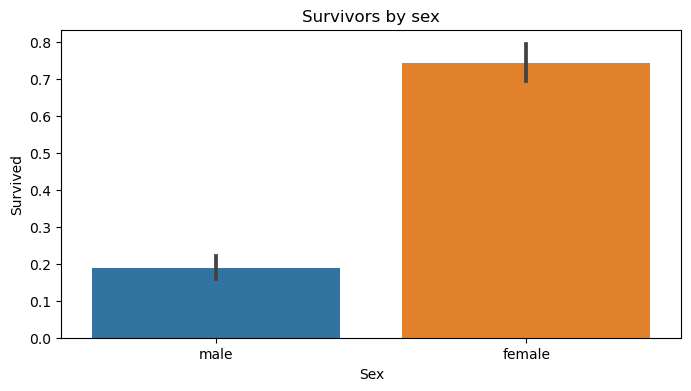

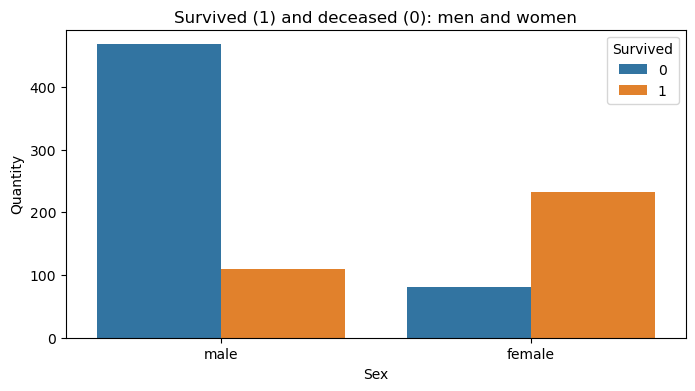

In [4]:
import seaborn as sns

# Plot 1 - bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survivors by sex')

# Plot 2 - count plot with hue
plt.figure(figsize=(8, 4))
sns.countplot(x='Sex', hue='Survived', data=data)
plt.ylabel('Quantity')
plt.title('Survived (1) and deceased (0): men and women')

plt.show()

# Feature Extraction

In [5]:
x=data[['PassengerId','Sex']].values
y=data['Survived'].values

In [6]:
x

array([[1, 'male'],
       [2, 'female'],
       [3, 'female'],
       ...,
       [889, 'female'],
       [890, 'male'],
       [891, 'male']], dtype=object)

In [7]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

# Converting text columns into numerical values

In [8]:
from sklearn import preprocessing
a=preprocessing.LabelEncoder()
a.fit(['female','male'])
x[:,1]=a.transform(x[:,1])

In [9]:
x

array([[1, 1],
       [2, 0],
       [3, 0],
       ...,
       [889, 0],
       [890, 1],
       [891, 1]], dtype=object)

Standardizing the data 

In [10]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)

# Splitting the data

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

# Logistic Regression Algorithm

In [12]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm

LogisticRegression()

# Fitting and Predicting

In [13]:
lm.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_pred=lm.predict(x_test)
y_pred


array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [15]:
print(lm.predict([[452,1]]))

[1]


In [16]:
print(lm.predict([[500,1]]))

[1]


In [17]:
print(lm.predict([[392,0]]))

[1]


In [18]:
print(lm.predict([[892,1]]))

[1]


In [19]:
print(lm.predict([[0,1]]))

[0]


# Calculating metrics to find accuray and various parameters

In [20]:
from sklearn import metrics
print('accuracy:',metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7713004484304933


In [21]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix : \n',cm)

confusion matrix : 
 [[119  16]
 [ 35  53]]


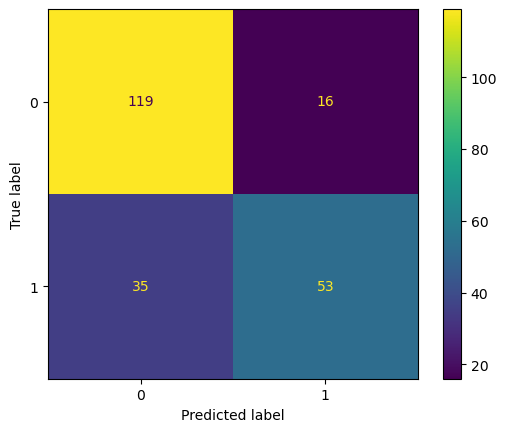

In [22]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
cm_display.plot()
plt.show()

In [23]:
print('accuracy:',metrics.classification_report(y_test,y_pred))

accuracy:               precision    recall  f1-score   support

           0       0.77      0.88      0.82       135
           1       0.77      0.60      0.68        88

    accuracy                           0.77       223
   macro avg       0.77      0.74      0.75       223
weighted avg       0.77      0.77      0.76       223

